<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana2/Notebooks/Distribuci%C3%B3n_Multinomial%2C_momentos%2C_covarianza_y_correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multinomial
from scipy.stats import kurtosis, skew  # curtosis y asimetría

In [5]:
np.random.choice(nombres_col, 2300)

array(['A', 'B', 'A', ..., 'B', 'A', 'A'], dtype='<U1')

In [6]:
np.random.choice(nombres_col, 2300)

array(['B', 'B', 'C', ..., 'B', 'A', 'C'], dtype='<U1')

In [7]:
np.random.choice(nombres_col, 2300)

array(['C', 'A', 'C', ..., 'B', 'B', 'B'], dtype='<U1')

In [11]:
n= 14
N = 2300
k = 3

# La suma de las probabilidades cada clase k,  debe sumar 1
p_vec = [1/3]*3
nombres_col = ['A', 'B', 'C']

df = pd.DataFrame(multinomial.rvs(n = n, p=p_vec, size = N),
                  columns = nombres_col)
df

,A,B,C
0,6,2,6
1,2,4,8
2,8,4,2
3,8,4,2
4,4,4,6
...,...,...,...
2295,6,5,3
2296,4,6,4
2297,1,6,7
2298,5,6,3


# Media Aritmética

> Bloc con sangría



$\bar{x} =\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i$

In [14]:
def media(df, col):
  N = len(df)
  sumatoria = df[col].sum()
  return sumatoria/N

media(df, 'A')

4.673478260869565

# Varianza

$\mathrm{Var}(X) =\dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i-\bar{x})^2$

In [16]:
def varianza(df, col):
  n = len(df)
  col_media =  media(df, col)
  sumatoria = ((df[col] - col_media)**2).sum()
  return sumatoria/n
varianza(df, 'A')

3.0155574669187146

# Histógramas

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: >]], dtype=object)

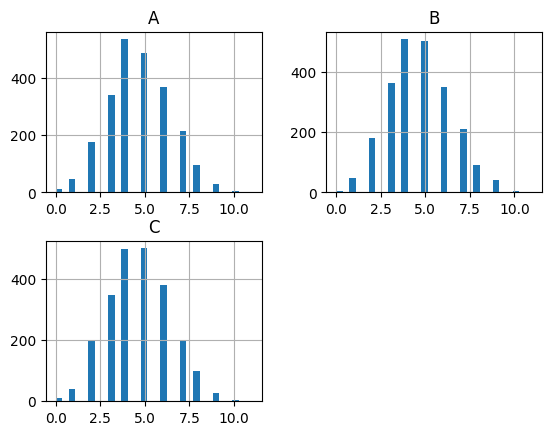

In [17]:
df.hist(bins=30)

In [19]:
kurtosis(df['A'], fisher=True ), skew(df['A'])

(-0.1111748657398457, 0.16365670312796848)

In [20]:
kurtosis(df['B']), skew(df['B'])

(-0.1679041752057584, 0.2497176819873971)

In [21]:
kurtosis(df['C']), skew(df['C'])

(-0.1502380392601821, 0.15997353345865434)

# Covarianza

$\mathrm{cov}(X, Y) =\dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i-\bar{x}) (y_i-\bar{y})$

In [25]:
def covarianza(df, col1 = str, col2=str):
  '''Covarianza entre dos columnas de un DataFrame'''
  mean_1 = media(df, col1)
  mean_2 = media(df, col2)
  sumatoria = ((df[col1]  - mean_1) * (df[col2] - mean_2)).sum()
  return sumatoria/len(df)
covarianza(df, 'A', 'A')

3.0155574669187146

In [23]:
# Matriz de covarianza
df.cov()

,A,B,C
A,3.016869,-1.521945,-1.494924
B,-1.521945,3.047529,-1.525584
C,-1.494924,-1.525584,3.020507


# Correlación
$\mathrm{corr}(X,Y) = \dfrac{\mathrm{cov}(X, Y)}{\sigma_x\sigma_y}$

In [ ]:
# la correlación se calcula dividiendo la covarianza entre dos variables entre el producto de sus desviaciones estándar

def correlacion(df , col1=str, col2=str):
  cov = covarianza(df, col1, col2)
  producto_desviaciones = np.sqrt(varianza(df, col1)) * np.sqrt(varianza(df,col2))
  return cov/producto_desviaciones

correlacion(df, 'A', 'C')

-0.3816686157013592

In [ ]:
df.corr()

,A,B,C
A,1.000000,-0.771420,-0.381669
B,-0.771420,1.000000,-0.293729
C,-0.381669,-0.293729,1.000000
